## Machine Learning

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve

### Loading Data

In [3]:
df_new_val = pd.read_csv("comprehensive_phishing_data.csv")
### taking 20% of the data
df_new = df_new_val.sample(frac = 0.07)
df_new.shape

(46383, 22)

In [8]:
df_new.columns

Index(['url', 'url_len', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*',
       ',', '//', 'abnormal_url', 'https', 'digits', 'letters',
       'Shortining_Service', 'having_ip_address', 'target'],
      dtype='object')

In [9]:
X = df_new.drop(['url'], axis=1)#,'type_code'
y = df_new['target']

In [10]:
df_new

,url,url_len,@,?,-,=,.,#,%,+,...,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,target
296045,http://zibae.ir/index.php?option=com_content&v...,84,0,1,0,5,2,0,0,0,...,0,0,1,1,0,2,65,0,0,0
78962,apps.carleton.edu/athletics/varsity_sports/wom...,114,0,1,0,2,2,0,0,0,...,0,0,0,0,0,12,85,0,0,1
360692,standupscottsdale.com/,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,20,0,0,1
20640,cahenry.com,11,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10,0,0,0
653547,vypress.com/products/nwsend/,28,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632,http://gloomky.com/wp-includes/customize/a3/,44,0,0,1,0,1,0,0,0,...,0,0,1,1,0,1,34,0,0,0
458409,absoluteastronomy.com/topics/Holly_Black,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,36,0,0,1
77763,kcl.ac.uk/lhcma/locreg/alpha.shtml,34,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,28,0,0,1
99730,eventosbacus.com,16,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,15,0,0,0


In [11]:
X.head()

,url_len,@,?,-,=,.,#,%,+,$,...,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,target
296045,84,0,1,0,5,2,0,0,0,0,...,0,0,1,1,0,2,65,0,0,0
78962,114,0,1,0,2,2,0,0,0,0,...,0,0,0,0,0,12,85,0,0,1
360692,22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,20,0,0,1
20640,11,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0
653547,28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,24,0,0,0


### Splitting Data Into Training And Testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Ensemble Learning

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=20)

model1 = DecisionTreeClassifier(random_state =0)
model2 = RandomForestClassifier(n_estimators=10)
model3 = KNeighborsClassifier()
model4 = GaussianNB()
# create the sub models
estimators = []
estimators.append(('Decision_Tree', model1))
estimators.append(('Random_Forest', model2))
estimators.append(('KNN', model3))
estimators.append(('NB', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)

In [33]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('Decision_Tree',
                              DecisionTreeClassifier(random_state=0)),
                             ('Random_Forest',
                              RandomForestClassifier(n_estimators=10)),
                             ('KNN', KNeighborsClassifier()),
                             ('NB', GaussianNB())])

In [34]:
print(f"The ensemble score is {ensemble.score(X_test,y_test) * 100}%")
predict_test = ensemble.predict(X_test)
print("""        ----- Classification report --------""")
print(classification_report(y_test, predict_test))

The ensemble score is 100.0%
        ----- Classification report --------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3191
           1       1.00      1.00      1.00      6086

    accuracy                           1.00      9277
   macro avg       1.00      1.00      1.00      9277
weighted avg       1.00      1.00      1.00      9277



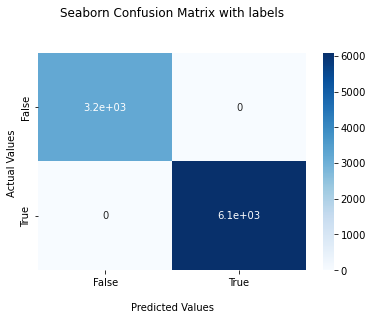

In [35]:
conf_matrix = confusion_matrix(y_test, predict_test)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

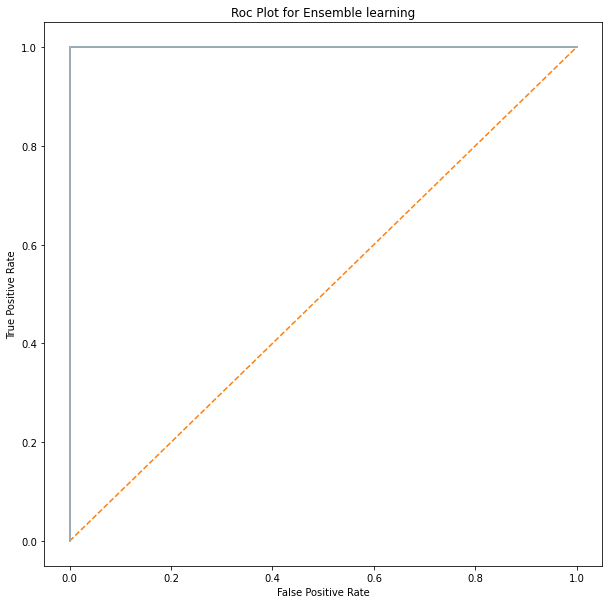

In [36]:
a, b, c = roc_curve(y_test, predict_test)
plt.subplots(1, figsize=(10,10))
plt.title('Roc Plot for Ensemble learning')
plt.plot(a, b)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
kfold = model_selection.KFold(n_splits=10)
model1 = DecisionTreeClassifier(random_state =0)
model2 = RandomForestClassifier(n_estimators=10)
model3 = KNeighborsClassifier()
model4 = GaussianNB()
# create the sub models
estimators = []
estimators.append(('Decision_Tree', model1))
estimators.append(('Random_Forest', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
print(f"The ensemble score is {ensemble.score(X_test,y_test) * 100}%")
predict_test = ensemble.predict(X_test)
print("""        ----- Classification report --------""")
print(classification_report(y_test, predict_test))

The ensemble score is 100.0%
        ----- Classification report --------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3191
           1       1.00      1.00      1.00      6086

    accuracy                           1.00      9277
   macro avg       1.00      1.00      1.00      9277
weighted avg       1.00      1.00      1.00      9277



In [19]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predict_test)
print(cf_matrix)

[[3191    0]
 [   0 6086]]


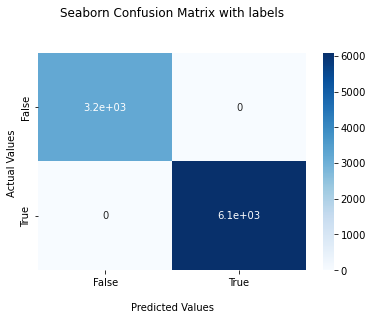

In [21]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
a, b, c = roc_curve(y_test, predict_test)

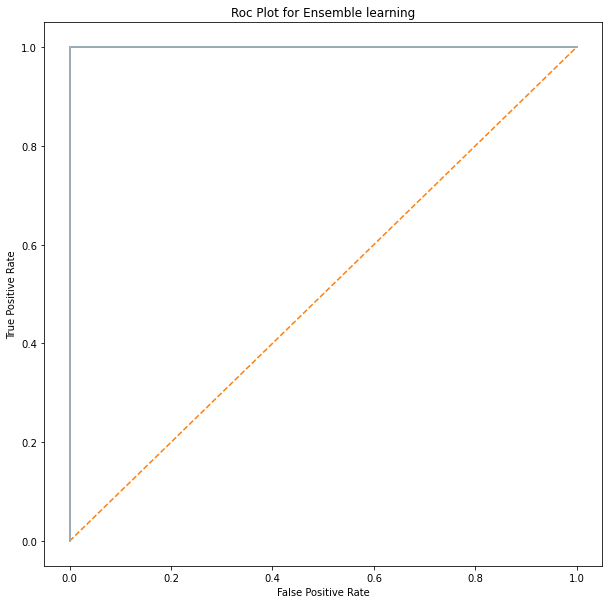

In [25]:
plt.subplots(1, figsize=(10,10))
plt.title('Roc Plot for Ensemble learning')
plt.plot(a, b)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
kfold = model_selection.KFold(n_splits=10)
model1 = DecisionTreeClassifier(random_state =0)
model2 = RandomForestClassifier(n_estimators=10)
model3 = KNeighborsClassifier()
model4 = GaussianNB()
# create the sub models
estimators = []
estimators.append(('KNN', model3))
estimators.append(('NB', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
print(f"The ensemble score is {ensemble.score(X_test,y_test) * 100}%")
predict_test = ensemble.predict(X_test)
print("""        ----- Classification report --------""")
print(classification_report(y_test, predict_test))

In [ ]:
kfold = model_selection.KFold(n_splits=10)
model1 = DecisionTreeClassifier(random_state =0)
model2 = RandomForestClassifier(n_estimators=10)
model3 = KNeighborsClassifier()
model4 = GaussianNB()
# create the sub models
estimators = []
estimators.append(('Decision_Tree', model1))
estimators.append(('NB', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
print(f"The ensemble score is {ensemble.score(X_test,y_test) * 100}%")
predict_test = ensemble.predict(X_test)
print("""        ----- Classification report --------""")
print(classification_report(y_test, predict_test))

In [ ]:
kfold = model_selection.KFold(n_splits=10)
model1 = DecisionTreeClassifier(random_state =0)
model2 = RandomForestClassifier(n_estimators=10)
model3 = KNeighborsClassifier()
model4 = GaussianNB()
# create the sub models
estimators = []
estimators.append(('Random_Forest', model2))
estimators.append(('NB', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
print(f"The ensemble score is {ensemble.score(X_test,y_test) * 100}%")
predict_test = ensemble.predict(X_test)
print("""        ----- Classification report --------""")
print(classification_report(y_test, predict_test))

### K-nearest Neighbours

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
print(f"The accuracy score for KNN classifier is {accuracy_score(y_test,y_predict) * 100}%")
print("""        ----- Classification report --------""")
print(classification_report(y_test, y_predict))

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict)
print(cf_matrix)

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Random Forest

In [ ]:
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(f" the accuracy score for Random Forest is {accuracy_score(y_test,y_pred) * 100}%")
print("""        ----- Classification report --------""")
print(classification_report(y_test, y_pred))

### Decisoin Tree

In [ ]:
classifier = DecisionTreeClassifier(random_state =0)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
print(f" the accuracy score for decision tree is {accuracy_score(y_test,y_predict) * 100}%")
print("""        ----- Classification report --------""")
print(classification_report(y_test, y_predict))